In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
#file_path = Path("Resources/2017-fCC-New-Coders-Survey-Data.csv")
data_cleaned = pd.read_csv('./clean-data/2017-fCC-New-Coders-Survey-Data.csv')
data_cleaned.head()
#data_cleaned = pd.read_csv(file_path)
#data_cleaned.head()

C:\Users\philk\AppData\Local\Temp\ipykernel_53140\439424405.py:11: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv('./clean-data/2017-fCC-New-Coders-Survey-Data.csv')


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data_cleaned.info()
data_cleaned.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [3]:
columns_to_drop=['YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev', 'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT', 'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn', 'YouTubeTheNewBoston', 'YouTubeDerekBanas', 'YouTubeDevTips', 'YouTubeEngineeredTruth']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

data_cleaned.columns

data_cleaned.to_csv("Newdf.csv",index=False)

In [4]:
data_cleaned.dtypes


Age                     float64
AttendedBootcamp        float64
BootcampFinish          float64
BootcampLoanYesNo       float64
BootcampName             object
                         ...   
StudentDebtOwe          float64
YouTubeCodeCourse       float64
YouTubeCodingTrain      float64
YouTubeCodingTut360     float64
YouTubeComputerphile    float64
Length: 123, dtype: object

In [5]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print(missing_values)

Age                      2808
AttendedBootcamp          466
BootcampFinish          17106
BootcampLoanYesNo       17096
BootcampName            17226
                        ...  
StudentDebtOwe          14813
YouTubeCodeCourse       17219
YouTubeCodingTrain      17199
YouTubeCodingTut360     16778
YouTubeComputerphile    16722
Length: 123, dtype: int64


In [6]:
# Step 1: Handle missing values by removing rows with missing values
data_cleaned = data_cleaned.dropna()

In [7]:
# Step 2: Remove duplicate records
data_cleaned = data_cleaned.drop_duplicates()

In [8]:
# Step 3: Merge Columns
# Merge 'Do you financially support any dependents?' and 'Do you have children?' into 'Dependents'
def merge_dependents(row):
    # Check if both columns exist and apply logic
    if 'Do you financially support any dependents?' in row.index and 'Do you have children?' in row.index:
        if row['Do you financially support any dependents?'] == 'Yes' or row['Do you have children?'] == 'Yes':
            return 'Yes'
        else:
            return 'No'
    return np.nan  # Return NaN if columns do not exist
# Apply the function to create the 'Dependents' column
data_cleaned['Dependents'] = data_cleaned.apply(merge_dependents, axis=1)
# Merge 'Do you have student loan debt?', 'Do you have any debt?', and 'Do you have a home mortgage?' into 'Debt status category'
def merge_debt(row):
    if 'Do you have student loan debt?' in row.index and row['Do you have student loan debt?'] == 'Yes':
        return 'Student Loan'
    elif 'Do you have a home mortgage?' in row.index and row['Do you have a home mortgage?'] == 'Yes':
        return 'Mortgage'
    elif 'Do you have any debt?' in row.index and row['Do you have any debt?'] == 'Yes':
        return 'Other Debt'
    else:
        return 'No Debt'
# Apply the function to create the 'Debt status category' column
data_cleaned['Debt status category'] = data_cleaned.apply(merge_debt, axis=1)
# Merge 'Other' columns ('Other' gender, employment/school, career)
def merge_other(row):
    if 'Other' in row.index and pd.notna(row['Other']):
        return row['Other']
    elif 'Other.1' in row.index and pd.notna(row['Other.1']):
        return row['Other.1']
    elif 'Other.2' in row.index and pd.notna(row['Other.2']):
        return row['Other.2']
    return np.nan
# Apply the function to merge 'Other' columns
data_cleaned['Other'] = data_cleaned.apply(merge_other, axis=1)



In [9]:
# Step 4: Remove irrelevant columns
columns_to_remove = ['Submit Date (UTC)', 'Start Date (UTC)', 'Network ID', 'Other.1', 'Other.2', 'Other']
data_cleaned = data_cleaned.drop(columns=[col for col in columns_to_remove if col in data_cleaned.columns])
# Step 5: Handle any inconsistencies in the data (assuming none for now)
# The data is now cleaned and ready for machine learning algorithms.
# Optional: Save the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_survey_data.csv', index=False)

In [10]:
# Step 6: Remove irrelevant columns if they exist in the dataset
columns_to_remove = ['Submit Date (UTC)', 'Start Date (UTC)', 'Network ID', '#', 'Other', 'Other.1', 'Other.2']
# Check if each column exists before dropping
data_cleaned = data_cleaned.drop(columns=[col for col in columns_to_remove if col in data_cleaned.columns], errors='ignore')

In [11]:
# Step 7: Display cleaned data (or save it to a new CSV file)
print(data_cleaned.head())  # Display the first few rows
# If you want to save the cleaned data to a new file
data_cleaned.to_csv('cleaned_data.csv', index=False)

Empty DataFrame
Columns: [Age, AttendedBootcamp, BootcampFinish, BootcampLoanYesNo, BootcampName, BootcampRecommend, ChildrenNumber, CityPopulation, CodeEventConferences, CodeEventDjangoGirls, CodeEventFCC, CodeEventGameJam, CodeEventGirlDev, CodeEventHackathons, CodeEventMeetup, CodeEventNodeSchool, CodeEventNone, CodeEventOther, CodeEventRailsBridge, CodeEventRailsGirls, CodeEventStartUpWknd, CodeEventWkdBootcamps, CodeEventWomenCode, CodeEventWorkshops, CommuteTime, CountryCitizen, CountryLive, EmploymentField, EmploymentFieldOther, EmploymentStatus, EmploymentStatusOther, ExpectedEarning, FinanciallySupporting, FirstDevJob, Gender, GenderOther, HasChildren, HasDebt, HasFinancialDependents, HasHighSpdInternet, HasHomeMortgage, HasServedInMilitary, HasStudentDebt, HomeMortgageOwe, HoursLearning, ID.x, ID.y, Income, IsEthnicMinority, IsReceiveDisabilitiesBenefits, IsSoftwareDev, IsUnderEmployed, JobApplyWhen, JobInterestBackEnd, JobInterestDataEngr, JobInterestDataSci, JobInterestDevO

In [12]:
# Step 1: Label Encoding for small categories and ordinal features
label_encoder = LabelEncoder()
# Label encode Gender (if binary or small categories)
if 'Gender' in data_cleaned.columns:
    data_cleaned['Gender_Encoded'] = label_encoder.fit_transform(data_cleaned['Gender'])
# Label encode Degree Level (ordinal)
if 'Degree Level' in data_cleaned.columns:
    data_cleaned['Degree_Level_Encoded'] = label_encoder.fit_transform(data_cleaned['Degree Level'])
# Label encode Employment Status
if 'Employment Status' in data_cleaned.columns:
    data_cleaned['Employment_Status_Encoded'] = label_encoder.fit_transform(data_cleaned['Employment Status'])
# Label encode Student Loan Debt (Yes/No or binary)
if 'Do you have student loan debt?' in data_cleaned.columns:
    data_cleaned['Student_Loan_Debt_Encoded'] = label_encoder.fit_transform(data_cleaned['Do you have student loan debt?'])
# Label encode Family Responsibilities (Yes/No for dependents, children)
if 'Dependents' in data_cleaned.columns:
    data_cleaned['Dependents_Encoded'] = label_encoder.fit_transform(data_cleaned['Dependents'])
# Step 2: One-Hot Encoding for unordered categorical variables
# One-hot encode Country of Residence
if 'Country of Residence' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Country of Residence'], prefix='Country')
# One-hot encode Citizenship
if 'Citizenship' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Citizenship'], prefix='Citizenship')
# One-hot encode Job Roles
if 'Job Roles' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Job Roles'], prefix='Job_Role')
# One-hot encode Field of Study
if 'Field of Study' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Field of Study'], prefix='Field_Study')
# One-hot encode Learning Preferences
if 'Learning Preferences' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Learning Preferences'], prefix='Learning_Pref')
# One-hot encode Coding Events/Workshops
if 'Coding Events/Workshops' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Coding Events/Workshops'], prefix='Coding_Event')
# One-hot encode Employment Type Preferences
if 'Employment Type Preferences' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Employment Type Preferences'], prefix='Employment_Type')
# Optional: Step 3: Handling High-Cardinality Features
# For very high-cardinality categorical features like 'Country', if dimensionality becomes an issue,
# consider using binary encoding from the 'category_encoders' library.
# Example: Using binary encoding for 'Country' feature with many categories
# Install the category_encoders package if needed:
# !pip install category_encoders
# from category_encoders import BinaryEncoder
# encoder = BinaryEncoder(cols=['Country'])
# data_cleaned = encoder.fit_transform(data_cleaned)
# Save the encoded dataset to a new CSV file
data_cleaned.to_csv('encoded_survey_data.csv', index=False)


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Load the dataset (replace with your actual file path)
data_cleaned = pd.read_csv('../clean-data/2017-fCC-New-Coders-Survey-Data.csv')
# Step 1: Identify Numerical Columns
# Select only numerical columns (int64 and float64)
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Step 2: Exclude binary or categorical columns from scaling
# Define the binary or categorical columns that should not be scaled
exclude_columns = ['Dependents', 'Gender', 'Employment Status']  # Add any other binary or categorical columns here
# Identify the numerical columns to scale by excluding the binary/categorical columns
columns_to_scale = [col for col in numerical_columns if col not in exclude_columns]
print("Columns to scale: ", columns_to_scale)
# Step 3: Normalize the selected columns using MinMaxScaler
scaler = MinMaxScaler()
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])
# Step 4: Standardize the selected columns using StandardScaler (if you want to standardize instead of normalize)
# scaler = StandardScaler()
# data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])
# The data is now normalized (or standardized if you uncomment the StandardScaler)
# Optional: Save the final processed data
data_cleaned.to_csv('final_processed_data.csv', index=False)
# Check the first few rows of the scaled data
print(data_cleaned.head())

C:\Users\philk\AppData\Local\Temp\ipykernel_53140\4159019413.py:3: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv('../clean-data/2017-fCC-New-Coders-Survey-Data.csv')


Columns to scale:  ['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampRecommend', 'ChildrenNumber', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps', 'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestProjMngr'

In [14]:
# Check for missing values in 'AttendedBootcamp' and 'BootcampFinish'
print(data_cleaned['AttendedBootcamp'].isnull().sum())
print(data_cleaned['BootcampFinish'].isnull().sum())

466
17106


In [15]:
# Drop rows where 'AttendedBootcamp' or 'BootcampFinish' have NaN values
data_cleaned = data_cleaned.dropna(subset=['AttendedBootcamp', 'BootcampFinish'])

In [16]:
# Define features (X) and targets ('AttendedBootcamp' and 'BootcampFinish') again after removing NaNs
X = data_cleaned.drop(columns=['AttendedBootcamp', 'BootcampFinish'])  # Features
y_attend = data_cleaned['AttendedBootcamp']  # Target 1: Attend Bootcamp
y_finish = data_cleaned['BootcampFinish']  # Target 2: Finish Bootcamp

In [17]:
from sklearn.model_selection import train_test_split
# Split data for 'AttendedBootcamp' prediction with stratified sampling
#X_train_attend, X_test_attend, y_train_attend, y_test_attend = train_test_split(X, y_attend, test_size=0.3, stratify=y_attend, random_state=42)

In [18]:

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.pipeline import Pipeline
# # Encode the y data with the label encoder
# # Create an instance of the label encoder
#initialize
label_encoder = LabelEncoder()

In [19]:
# encoding_pipeline = Pipeline([
#     ('encoding',MultiColumnLabelEncoder(columns=['fruit','color']))
   
# ])
# encoding_pipeline.fit_transform(fruit_data)
for c in X.columns:

    X[c] = label_encoder.fit_transform(X[c])

X


,Age,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
14,15,0,27,1,5,0,1,1,1,1,...,1,1,1,1,1,1,1,64,1,1
24,14,0,70,1,5,2,1,1,1,1,...,1,0,1,1,1,1,1,64,1,1
26,18,0,55,1,5,0,0,1,1,1,...,1,1,1,1,1,1,1,64,1,1
46,14,0,128,1,5,0,1,1,1,1,...,1,1,1,1,1,0,1,64,1,0
75,18,0,20,1,5,2,1,1,1,1,...,0,0,0,1,1,1,0,64,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,49,0,141,1,1,2,1,1,1,1,...,1,1,1,1,1,0,1,64,1,1
18093,17,0,48,1,4,0,1,1,1,1,...,1,1,1,1,0,0,0,64,1,1
18114,32,1,34,1,1,0,1,1,1,0,...,0,1,1,1,1,0,1,64,1,1
18122,36,0,79,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,64,1,1


In [20]:
y_finish.value_counts()

BootcampFinish
1.0    748
0.0    321
Name: count, dtype: int64

In [21]:
# Split data for 'BootcampFinish' prediction with stratified sampling
X_train_finish, X_test_finish, y_train_finish, y_test_finish = train_test_split(X, y_finish, test_size=0.3, stratify=y_finish, random_state=42)

In [22]:
# #train_attend = pd.concat([X_train_attend, y_train_attend], axis=1)
# #test_attend = pd.concat([X_test_attend, y_test_attend], axis=1)
# train_attend['Set'] = 'Train'
# test_attend['Set'] = 'Test'
# combined_attend = pd.concat([train_attend, test_attend])
# combined_attend.to_csv('attended_bootcamp_data.csv', index=False)

In [23]:
# For 'BootcampFinish' target
train_finish = pd.concat([X_train_finish, y_train_finish], axis=1)
test_finish = pd.concat([X_test_finish, y_test_finish], axis=1)
train_finish['Set'] = 'Train'
test_finish['Set'] = 'Test'
combined_finish = pd.concat([train_finish, test_finish])
combined_finish.to_csv('bootcamp_finish_data.csv', index=False)

In [24]:
# Define file paths for each member (you can modify these paths as needed)
path_ayana = "datasets/ayana/"
path_roberta = "datasets/roberta/"
path_dom = "datasets/dom/"
path_phillip = "datasets/phillip/"


In [25]:
import os

In [26]:
# Create directories if they don't exist
os.makedirs(path_ayana, exist_ok=True)
os.makedirs(path_roberta, exist_ok=True)
os.makedirs(path_dom, exist_ok=True)
os.makedirs(path_phillip, exist_ok=True)

In [27]:
# Ensure the paths exist (if necessary)
# For Ayana: Logistic Regression & Decision Trees (AttendedBootcamp and BootcampFinish)
# Export Ayana's training and test datasets for AttendedBootcamp
# X_train_attend.to_csv(path_ayana + "X_train_attend.csv", index=False)
# y_train_attend.to_csv(path_ayana + "y_train_attend.csv", index=False)
# X_test_attend.to_csv(path_ayana + "X_test_attend.csv", index=False)
# y_test_attend.to_csv(path_ayana + "y_test_attend.csv", index=False)

In [28]:
# Export Ayana's training and test datasets for BootcampFinish
# X_train_finish.to_csv(path_ayana + "X_train_finish.csv", index=False)
# y_train_finish.to_csv(path_ayana + "y_train_finish.csv", index=False)
# X_test_finish.to_csv(path_ayana + "X_test_finish.csv", index=False)
# y_test_finish.to_csv(path_ayana + "y_test_finish.csv", index=False)

In [29]:
##Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# # Load the data
# X_train_attend = pd.read_csv(path_roberta + "X_train_attend.csv")
# y_train_attend = pd.read_csv(path_roberta + "y_train_attend.csv").values.ravel()
# X_test_attend = pd.read_csv(path_roberta + "X_test_attend.csv")
# y_test_attend = pd.read_csv(path_roberta + "y_test_attend.csv").values.ravel()

# # Load finish data
# X_train_finish = pd.read_csv(path_roberta + "X_train_finish.csv")
# y_train_finish = pd.read_csv(path_roberta + "y_train_finish.csv").values.ravel()
# X_test_finish = pd.read_csv(path_roberta + "X_test_finish.csv")
# y_test_finish = pd.read_csv(path_roberta + "y_test_finish.csv").values.ravel()

In [31]:
# Initialize the Decision Tree model
#dt_model_attend = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
#dt_model_attend.fit(X_train_attend, y_train_attend)

# Make predictions on the test set
#y_pred_attend = dt_model_attend.predict(X_test_attend)

# Evaluate the model
#print("Accuracy (Attend):", accuracy_score(y_test_attend, y_pred_attend))
#print(classification_report(y_test_attend, y_pred_attend))

In [32]:
X_test_finish

,Age,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
15799,14,0,141,1,5,2,1,1,1,1,...,0,1,1,1,1,1,1,64,1,1
7643,12,0,65,1,5,2,0,1,1,1,...,1,1,1,1,1,1,1,64,1,1
11330,49,1,135,1,5,3,1,1,1,1,...,1,1,1,0,1,1,1,64,1,1
14366,14,1,110,1,5,1,1,1,0,1,...,0,1,0,1,1,0,1,64,1,1
12291,49,1,68,1,5,3,1,1,1,1,...,0,1,1,1,0,1,1,64,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358,15,0,140,0,5,2,1,1,1,1,...,1,1,1,1,1,1,1,64,1,1
804,18,0,88,0,5,0,1,1,0,1,...,0,0,1,1,1,0,1,64,1,1
10408,49,0,4,1,5,3,1,1,0,1,...,1,1,1,1,1,1,0,64,1,1
1873,36,0,62,1,5,0,1,1,0,1,...,1,1,1,1,1,1,1,64,1,1


In [33]:
# Initialize the Decision Tree model for finish data
dt_model_finish = DecisionTreeClassifier(random_state=42)

# Convert categorical variables to dummy/indicator variables
# X_train_finish = pd.get_dummies(X_train_finish) -------------------------------- chnage back if needed 10/29
# X_test_finish = pd.get_dummies(X_test_finish)   -------------------------------- chnage back if needed 10/29

# Align the columns of train and test sets
X_train_finish, X_test_finish = X_train_finish.align(X_test_finish, join='left', axis=1, fill_value=0)

# Fit the model
dt_model_finish.fit(X_train_finish, y_train_finish)

# Make predictions
#y_pred_finish = dt_model_finish.predict(X_test_finish)
y_pred_finish = dt_model_finish.predict(X_test_finish)
# Evaluate the model
print("Accuracy (Finish):", accuracy_score(y_test_finish, y_pred_finish))
print(classification_report(y_test_finish, y_pred_finish))

Accuracy (Finish): 0.735202492211838
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55        96
         1.0       0.81      0.81      0.81       225

    accuracy                           0.74       321
   macro avg       0.68      0.68      0.68       321
weighted avg       0.73      0.74      0.73       321



In [34]:
### Load the Data 
path_roberta = "datasets/roberta/"

In [35]:
# For Roberta: Random Forest
# X_train_attend.to_csv(path_roberta + "X_train_attend.csv", index=False)
# y_train_attend.to_csv(path_roberta + "y_train_attend.csv", index=False)
# X_test_attend.to_csv(path_roberta + "X_test_attend.csv", index=False)
# y_test_attend.to_csv(path_roberta + "y_test_attend.csv", index=False)
X_train_finish.to_csv(path_roberta + "X_train_finish.csv", index=False)
y_train_finish_df = pd.DataFrame(y_train_finish)
y_train_finish_df.to_csv(path_roberta + "y_train_finish.csv", index=False)
X_test_finish.to_csv(path_roberta + "X_test_finish.csv", index=False)
y_test_finish_df = pd.DataFrame(y_test_finish)
y_test_finish_df.to_csv(path_roberta + "y_test_finish.csv", index=False)

In [36]:
###Train a Random Forest Model
# Flatten the target DataFrames (if necessary)
# Convert to 1D array if needed
# X_train_attend = pd.read_csv("datasets/roberta/X_train_attend.csv")
# y_train_attend = pd.read_csv("datasets/roberta/y_train_attend.csv").values.ravel()  
# X_test_attend = pd.read_csv("datasets/roberta/X_test_attend.csv")
# y_test_attend = pd.read_csv("datasets/roberta/y_test_attend.csv").values.ravel() 

# # Convert categorical variables to dummy/indicator variables
# X_train_attend = pd.get_dummies(X_train_attend)
# X_test_attend = pd.get_dummies(X_test_attend)

# # Align the columns of train and test sets
# X_train_attend, X_test_attend = X_train_attend.align(X_test_attend, join='left', axis=1, fill_value=0)

# # Initialize the model
# rf_model_attend = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model
# rf_model_attend.fit(X_train_attend, y_train_attend)

# # Make predictions
# y_pred_attend = rf_model_attend.predict(X_test_attend)

# # Evaluate the model
# print("Accuracy (Attend):", accuracy_score(y_test_attend, y_pred_attend))
# print(classification_report(y_test_attend, y_pred_attend))

In [37]:
# ###Train a Random Forest Model
# X_train_finish = pd.read_csv("datasets/roberta/X_train_finish.csv")
# y_train_finish = pd.read_csv("datasets/roberta/y_train_finish.csv").values.ravel()  
# X_test_finish = pd.read_csv("datasets/roberta/X_test_finish.csv")
# y_test_finish = pd.read_csv("datasets/roberta/y_test_finish.csv").values.ravel()

# Convert categorical variables to dummy/indicator variables
# X_train_finish = pd.get_dummies(X_train_finish)
# X_test_finish = pd.get_dummies(X_test_finish)

# Align the columns of train and test sets
X_train_finish, X_test_finish = X_train_finish.align(X_test_finish, join='left', axis=1, fill_value=0)

rf_model_finish = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_finish.fit(X_train_finish, y_train_finish)
y_pred_finish = rf_model_finish.predict(X_test_finish)

print("Accuracy (Finish):", accuracy_score(y_test_finish, y_pred_finish))
print(classification_report(y_test_finish, y_pred_finish))


Accuracy (Finish): 0.8130841121495327
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.66        96
         1.0       0.84      0.90      0.87       225

    accuracy                           0.81       321
   macro avg       0.78      0.75      0.77       321
weighted avg       0.81      0.81      0.81       321



In [38]:
importance = rf_model_finish.feature_importances_
feature_df = pd.DataFrame({"Feature": X.columns,'Gini Importance': importance}).sort_values('Gini Importance', ascending = False)
feature_df

,Feature,Gini Importance
71,MonthsProgramming,0.049566
70,MoneyForLearning,0.042878
64,JobPref,0.038336
50,JobApplyWhen,0.037024
42,HoursLearning,0.035833
...,...,...
91,PodcastShopTalk,0.000727
14,CodeEventNone,0.000660
90,PodcastSERadio,0.000642
132,YouTubeSimplilearn,0.000467


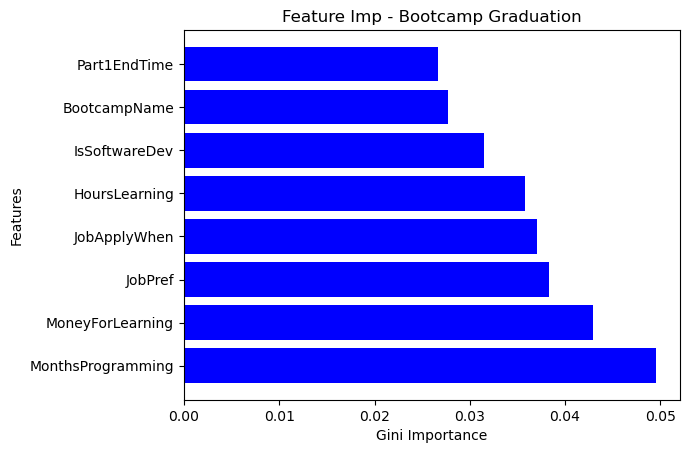

In [39]:
import matplotlib.pyplot as plt

feature_10 = feature_df[:8]

plt.barh(feature_10['Feature'], feature_10['Gini Importance'], color='blue', )
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Imp - Bootcamp Graduation')
plt.show()

# XGBoost DATA Analysis

In [41]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Create a new LabelEncoder specifically for the target variable
target_le = LabelEncoder()

# Fit the target encoder on the training labels
y_train_encoded = target_le.fit_transform(y_train_finish)

In [42]:
# Convert categorical columns in X_train_finish and X_test_finish to numerical values
# Assuming X_train_finish and X_test_finish are pandas DataFrames
for column in X_train_finish.select_dtypes(include=['object']).columns:
    le = LabelEncoder()  # Create a new LabelEncoder for each column

    # Fit on the combined unique values from both train and test data
    all_values = pd.concat([X_train_finish[column], X_test_finish[column]]).unique()
    le.fit(all_values)

    X_train_finish[column] = le.transform(X_train_finish[column])  # Encode the training data
    X_test_finish[column] = le.transform(X_test_finish[column])  # Encode the test data# Convert categorical columns in X_train_finish and X_test_finish to numerical values

In [43]:
X_test_finish[['BootcampName']].head()

,BootcampName
15799,141
7643,65
11330,135
14366,110
12291,68


In [44]:
# Use the target encoder to transform the test labels, handling unseen labels
try:
    y_test_encoded = target_le.transform(y_test_finish)  # This will raise an error if unseen labels exist
except ValueError as e:
    print(f"Warning: {e}. Encoding unseen labels as -1.")
    # Get unseen labels and add them to the encoder
    unseen_labels = set(y_test_finish) - set(target_le.classes_)
    for label in unseen_labels:
        target_le.classes_ = np.append(target_le.classes_, label)
    y_test_encoded = target_le.transform(y_test_finish)

In [45]:

# Creating an XGBoost classifier
model = xgb.XGBClassifier()

In [46]:
# Training the model on the training data
model.fit(X_train_finish, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
X_train_finish[['BootcampName']].head()

,BootcampName
12186,141
9039,37
7690,43
12899,141
412,95


In [48]:
X_test_finish[['BootcampName']].head()

,BootcampName
15799,141
7643,65
11330,135
14366,110
12291,68


In [49]:
# Making predictions on the test set
predictions = model.predict(X_test_finish)

In [50]:
# Evaluate the model
print(f'Training Score: {model.score(X_train_finish, y_train_encoded)}')
print(f'Testing Score: {model.score(X_test_finish, y_test_encoded)}')

Training Score: 1.0
Testing Score: 0.8255451713395638


In [51]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 20, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = xgb.XGBClassifier(max_depth=depth)
    clf.fit(X_train_finish, y_train_finish)

    train_score = clf.score(X_train_finish, y_train_finish)
    test_score = clf.score(X_test_finish, y_test_finish)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df.head()

,train,test
depth,,
1,0.848930,0.825545
3,0.998663,0.828660
5,1.000000,0.828660
7,1.000000,0.797508
9,1.000000,0.813084


<Axes: xlabel='depth'>

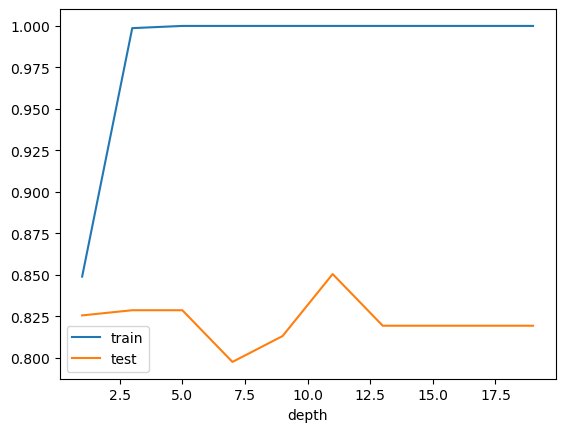

In [52]:
# Plot the scores dataframe with the plot method
scores_df.plot()

In [53]:
 # For Dom: SVM & KNN                         ========== 10/29 comments
# X_train_attend.to_csv(path_dom + "X_train_attend.csv", index=False)
# y_train_attend.to_csv(path_dom + "y_train_attend.csv", index=False)
# X_test_attend.to_csv(path_dom + "X_test_attend.csv", index=False)
# y_test_attend.to_csv(path_dom + "y_test_attend.csv", index=False)
# X_train_finish.to_csv(path_dom + "X_train_finish.csv", index=False)
# y_train_finish.to_csv(path_dom + "y_train_finish.csv", index=False)
# X_test_finish.to_csv(path_dom + "X_test_finish.csv", index=False)
# y_test_finish.to_csv(path_dom + "y_test_finish.csv", index=False)


In [54]:
# # For Phillip: XGBoost & LightGBM
# X_train_attend.to_csv(path_phillip + "X_train_attend.csv", index=False)
# y_train_attend.to_csv(path_phillip + "y_train_attend.csv", index=False)
# X_test_attend.to_csv(path_phillip + "X_test_attend.csv", index=False)
# y_test_attend.to_csv(path_phillip + "y_test_attend.csv", index=False)
# X_train_finish.to_csv(path_phillip + "X_train_finish.csv", index=False)
# y_train_finish.to_csv(path_phillip + "y_train_finish.csv", index=False)
# X_test_finish.to_csv(path_phillip + "X_test_finish.csv", index=False)
# y_test_finish.to_csv(path_phillip + "y_test_finish.csv", index=False)

In [55]:
# you can export the clean dataset for each member as well
data_cleaned.to_csv(path_ayana + "clean_dataset.csv", index=False)
data_cleaned.to_csv(path_roberta + "clean_dataset.csv", index=False)
data_cleaned.to_csv(path_dom + "clean_dataset.csv", index=False)
data_cleaned.to_csv(path_phillip + "clean_dataset.csv", index=False)

# Missing Values

In [60]:
import pandas as pd

# Example data for demonstration
data_attend = {
    'column1': [1, 2, None, 4],
    'column2': [None, 2, 3, 4]
}

data_finish = {
    'column1': [None, 2, 3, 4],
    'column2': [1, None, 3, 4]
}

# Define the DataFrames
X_train_attend = pd.DataFrame(data_attend)
X_train_finish = pd.DataFrame(data_finish)

# Find the percentage of null values in each column
percentage_null_attend = X_train_attend.isna().sum() / len(X_train_attend)
percentage_null_finish = X_train_finish.isna().sum() / len(X_train_finish)

# Print the results
print("Percentage of null values in X_train_attend:")
print(percentage_null_attend)
print("\nPercentage of null values in X_train_finish:")
print(percentage_null_finish)

Percentage of null values in X_train_attend:
column1    0.25
column2    0.25
dtype: float64

Percentage of null values in X_train_finish:
column1    0.25
column2    0.25
dtype: float64


In [64]:
import pandas as pd

# Example data to create a DataFrame
data = {
    'job': ['Engineer', 'Doctor', 'Artist', None, 'Engineer', 'Doctor', None],
    'age': [25, 30, 22, 28, 35, 40, 29]
}

# Create a DataFrame and assign it to X_train
X_train = pd.DataFrame(data)

# Now you can explore the 'job' column
print(X_train['job'].value_counts())  # This will show the counts of each job, including NaN values

job
Engineer    2
Doctor      2
Artist      1
Name: count, dtype: int64


In [65]:
import pandas as pd

# Example data to create a DataFrame
data = {
    'job': ['Engineer', 'Doctor', 'Artist', None, 'Engineer', 'Doctor', None],
    'age': [25, 30, 22, 28, 35, 40, 29]
}

# Create a DataFrame and assign it to X_train
X_train = pd.DataFrame(data)

# Now you can explore the 'job' column
print(X_train['job'].value_counts())  # This will show the counts of each job, including NaN values

job
Engineer    2
Doctor      2
Artist      1
Name: count, dtype: int64


In [70]:
# Explore each column with missing values to determine the best fill strategy
# First the job column
# Replace 'job' with the actual column name you want to analyze
X_train['job'].value_counts()  # Ensure 'job' exists in X_train

job
Engineer    2
Doctor      2
Artist      1
Name: count, dtype: int64